# 01.01 - PROYECTO KAGGLE

## download data directly from Kaggle

- create a file `kaggle.json` with your authentication token (in kaggle $\to$ click user icon on top-right $\to$ settings $\to$ API create new token)
- upload it to this notebook workspace
- run the following cell

In [2]:
import os
!wget https://raw.githubusercontent.com/ronaldrodas/ai4eng-20242/main/kaggle.json
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

--2024-09-08 22:01:10--  https://raw.githubusercontent.com/ronaldrodas/ai4eng-20242/main/kaggle.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67 [text/plain]
Saving to: ‘kaggle.json.5’

kaggle.json.5       100%[===================>]      67  --.-KB/s    in 0s      

2024-09-08 22:01:10 (1.12 MB/s) - ‘kaggle.json.5’ saved [67/67]

udea-ai4eng-20242.zip: Skipping, found more recently modified local copy (use --force to force download)


## unzip and inspect data

In [3]:
!unzip udea*.zip > /dev/null

replace submission_example.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [4]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  50135751 test.csv
   692501  10666231 118025055 train.csv
  1286075  15528571 172877479 total


## load `train.csv` data with pandas



In [5]:
import pandas as pd
import numpy as np

z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)


shape of loaded dataframe (692500, 12)


In [6]:
z.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


ESte código cuenta los estudiantes por departamento, crea un DataFrame con estos datos, agrega una fila con el total de estudiantes y luego muestra esta tabla.

In [7]:
department_counts = z['ESTU_PRGM_DEPARTAMENTO'].value_counts()   # Contar la cantidad de estudiantes por departamento

department_table = pd.DataFrame({    # Crear un DataFrame con los resultados
    'Departamento': department_counts.index,
    'Cantidad de Estudiantes': department_counts.values
})

total_students = department_counts.sum()   # Agregar una fila para el total
total_row = pd.DataFrame({
    'Departamento': ['Total'],
    'Cantidad de Estudiantes': [total_students]
})

department_table = pd.concat([department_table, total_row], ignore_index=True)   # Concatenar la fila del total con el DataFrame original

print(department_table)  # Mostrar la tabla



       Departamento  Cantidad de Estudiantes
0            BOGOTÁ                   282159
1         ANTIOQUIA                    83607
2             VALLE                    44588
3         ATLANTICO                    41020
4         SANTANDER                    28828
5   NORTE SANTANDER                    22588
6           BOLIVAR                    20629
7            BOYACA                    14048
8      CUNDINAMARCA                    14018
9            NARIÑO                    13454
10        RISARALDA                    12679
11          CORDOBA                    12188
12           TOLIMA                    11921
13           CALDAS                    11640
14            CAUCA                    11471
15            HUILA                     9995
16        MAGDALENA                     9512
17            SUCRE                     8674
18            CESAR                     8279
19          QUINDIO                     8229
20             META                     7910
21       L

Este código genera un gráfico de barras que muestra la cantidad de estudiantes por departamento utilizando matplotlib

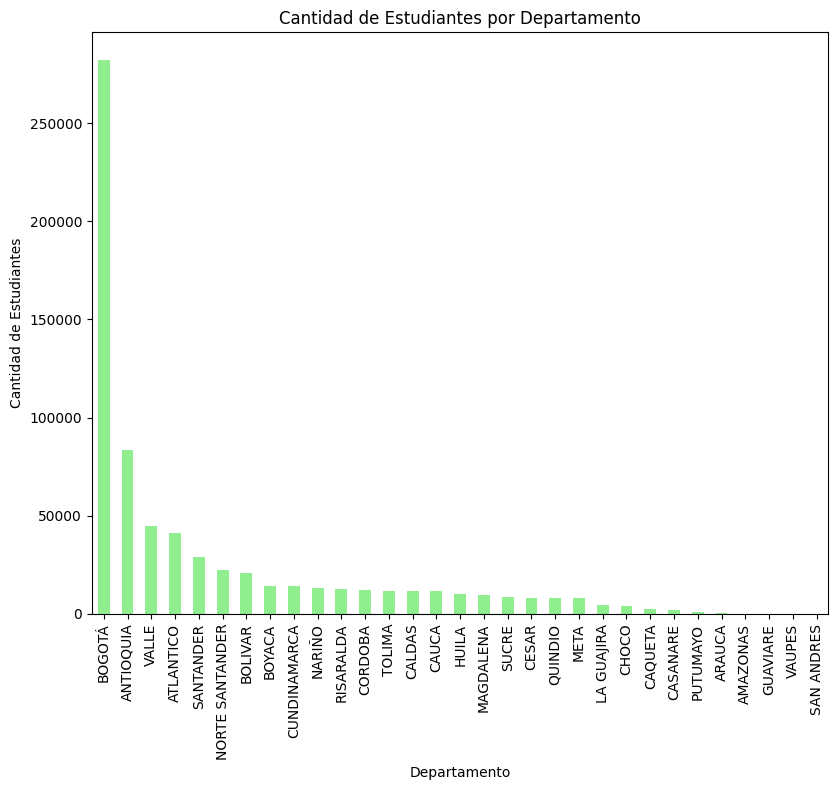

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))   # Crear el gráfico
plt.subplot(1, 2, 2)
department_counts.plot(kind='bar', color='lightgreen')
plt.title('Cantidad de Estudiantes por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de Estudiantes')
plt.xticks(rotation=90)
plt.tight_layout()  # Mostrar el gráfico
plt.show()

Este código crea un DataFrame que muestra la distribución de los estratos y agrega una fila al final que muestra el total de conteo de todos los estratos.

In [9]:
column_name = 'FAMI_ESTRATOVIVIENDA'

estrato_counts = z[column_name].value_counts().sort_index()   # Contar la frecuencia de cada estrato

estrato_table = pd.DataFrame({    # Crear un DataFrame con los resultados
    'Estrato': estrato_counts.index,
    'Conteo_Estrato': estrato_counts.values
})

total_conteo = estrato_counts.sum()   # Calcular el total de conteo de estratos

total_row = pd.DataFrame({       # Crear una fila para el total
    'Estrato': ['Total'],
    'Conteo_Estrato': [total_conteo]
})

estrato_table = pd.concat([estrato_table, total_row], ignore_index=True)   # Concatenar la fila del total con el DataFrame original

print(estrato_table)   # Mostrar el DataFrame

       Estrato  Conteo_Estrato
0    Estrato 1          111991
1    Estrato 2          232671
2    Estrato 3          210685
3    Estrato 4           65514
4    Estrato 5           23608
5    Estrato 6           12605
6  Sin Estrato            3289
7        Total          660363


Este código crea un gráfico de barras para visualizar la distribución de los estratos

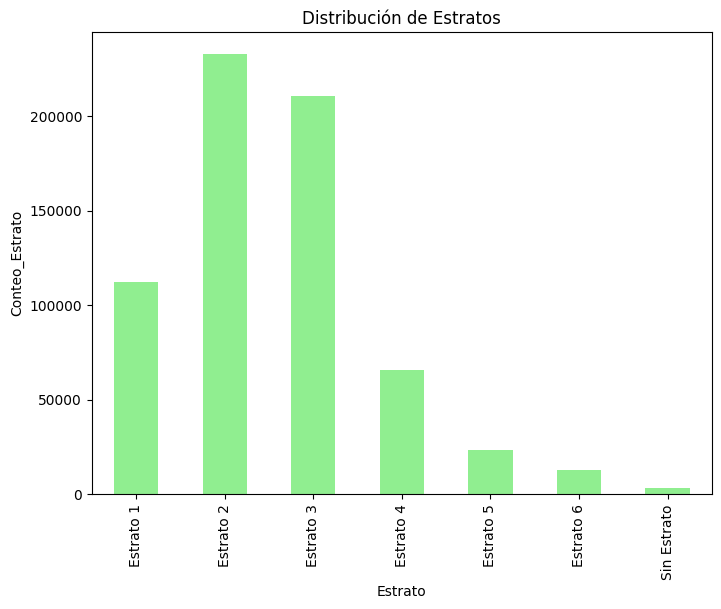

In [10]:
plt.figure(figsize=(8, 6))
estrato_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribución de Estratos')
plt.xlabel('Estrato')
plt.ylabel('Conteo_Estrato')
plt.show()